# Predictive Analytics of The Survival of Titanic Passengers using ML Techniques. 

## Import Libraries

In [2]:
import pandas as pd

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def set_plotting_style():
    # Set the default style
    sns.set_style("darkgrid")
    
    # Set the size of all parameters
    plt.rcParams['figure.figsize'] = (8, 6)  # Set the figure size
    plt.rcParams['figure.dpi'] = 80  # Set the figure dpi
    plt.rcParams['font.size'] = 12  # Set the font size
    plt.rcParams['legend.fontsize'] = 'medium'  # Set the legend font size
    plt.rcParams['figure.titlesize'] = 'large'  # Set the figure title size
    plt.rcParams['axes.titlesize'] = 'large'  # Set the axes title size
    plt.rcParams['axes.labelsize'] = 'medium'  # Set the axes label size
    plt.rcParams['xtick.labelsize'] = 'medium'  # Set the xticks label size
    plt.rcParams['ytick.labelsize'] = 'medium'  # Set the yticks label size

PassengerId - the unique id of the row, it doesn't have any effect on Survived value.

Survived - binary:

1 -> Survived
0 -> Not survived

PassengerId - the unique id of the row, it doesn't have any effect on Survived value.

Survived - binary:

1 -> Survived
0 -> Not survived
Pclass (Passenger Class) - economic status of the passenger, this variable has 3 values;

1 -> Upper Class
2 -> Middle Class
3 -> Lower Class
Name, Sex and Age - are self-explanatory.

SibSp - the total number of the passengers' siblings and spouse.

Parch - the total number of the passengers' parents and children.

Ticket - the ticket number.

Fare - the passenger fare.

Cabin - the cabin number.

Embarked is port of embarkation, 3 values:

C -> Cherbourg
Q -> Queenstown
S -> Southampton

## Data Wrangling

### Gather

In [4]:
# Load the train data
train_df = pd.read_csv("C:/Users/ADMIN/Desktop/ML_Project/ML_Project/datasets/raw/trained.csv")

# Load the test data
test_df = pd.read_csv('C:/Users/ADMIN/Desktop/ML_Project/ML_Project/datasets/raw/tested.csv')

# Display first few rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Splitting your data into training and testing sets before preprocessing is a crucial step in machine learning for several reasons:

1. **Preventing Data Leakage:**
   - If you preprocess the entire dataset before splitting it, information from the test set might leak into the training set. For example, if you scale the features based on the whole dataset, the test set would influence the mean and standard deviation used for scaling, leading to an overly optimistic evaluation of the model's performance.

2. **Evaluating Model Generalization:**
   - The primary goal of splitting the data is to simulate how well your model will generalize to new, unseen data. The testing set serves as a proxy for new, real-world data that your model has not encountered during training. If you preprocess the test set along with the training set, you may compromise the model evaluation because the test set would no longer represent unseen data.

3. **Mimicking Real-world Scenarios:**
   - In practice, when deploying a machine learning model, you won't have access to future information. By splitting the data first, you mimic the real-world scenario where your model must make predictions on new, unknown data based only on the information it learned during training.

4. **Avoiding Overfitting to the Test Set:**
   - Preprocessing, such as feature scaling, might involve using statistics like the mean and standard deviation. If you calculate these statistics on the entire dataset, including the test set, your model might unintentionally overfit to the test set. Overfitting to the test set can lead to overly optimistic evaluation metrics.

5. **Facilitating Cross-validation:**
   - When performing model selection and hyperparameter tuning, it's common to use techniques like cross-validation. Splitting the data first allows you to use cross-validation on the training set while keeping the test set completely separate for final model evaluation.

In summary, splitting your data before preprocessing helps ensure a clean and unbiased evaluation of your machine learning model's performance. It prevents data leakage, mimics real-world scenarios, and allows for reliable model evaluation on unseen data.

### Assess

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking for data types
# Training data information
train_df.info()

# Test data informarion 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived

In [7]:
# Check the number of missing values in each column in the train se
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check the number of missing values in each column in the test set
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Check for duplicates in the train set
train_duplicates = train_df.duplicated()
print("Duplicates in train set:", train_duplicates.sum())

# Check for duplicates in the test set
test_duplicates = test_df.duplicated()
print("Duplicates in test set:", test_duplicates.sum())

Duplicates in train set: 0
Duplicates in test set: 0


In [10]:
# Get the value counts of the 'Survived' column
value_counts = train_df['Survived'].value_counts()

# Print the value counts
print(value_counts)

Survived
0    549
1    342
Name: count, dtype: int64


### Assessment conclusion

1.There are missing values in datasets.

2.The are no duplicates in the datasets.

3.There are outliers in the datasets.

4.The columns are in their desired format.

5.Data types of all variables have been checked and they match with the requirements.

6.The data is not balanced

7.Each observation is a row.

8.Each variable is acolumn

### Clean

In [11]:
# Fill missing values in the 'Embarked' column with 'S'
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [12]:
# Create a median imputer object
age_imputer = SimpleImputer(strategy='median')

# Fit the imputer and transform the "Age" column of the train set
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])

In [13]:
# Create a median imputer object
median_imputer = SimpleImputer(strategy='median')

# Compute the medians from the train set
median_imputer.fit(train_df[['Age', 'Fare']])

# Fill missing values in the test set using the computed medians
test_df[['Age', 'Fare']] = median_imputer.transform(test_df[['Age', 'Fare']])

In [14]:
# Drop the feature in the train data
feature_drop = ['PassengerId', 'Name','Cabin','Ticket']

train_df.drop(feature_drop, axis=1, inplace=True)


test_df.drop(feature_drop, axis=1, inplace=True)

In [15]:
train_df.head()
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [16]:
train_df.to_csv(r'C:\Users\ADMIN\Desktop\ML_Project\ML_Project\datasets\clean\train_cleaned.csv', index=False)
test_df.to_csv(r'C:\Users\ADMIN\Desktop\ML_Project\ML_Project\datasets\clean\test_cleaned.csv', index=False)

## EDA

In [17]:
# Load the cleaned train data
train_cn = pd.read_csv(r"C:\Users\ADMIN\Desktop\ML_Project\ML_Project\datasets\clean\train_cleaned.csv")

# Load the cleaned test data
test_cn = pd.read_csv(r'C:\Users\ADMIN\Desktop\ML_Project\ML_Project\datasets\clean\test_cleaned.csv')

In [47]:
train_cn.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Univariate Analysis

#### Categorical

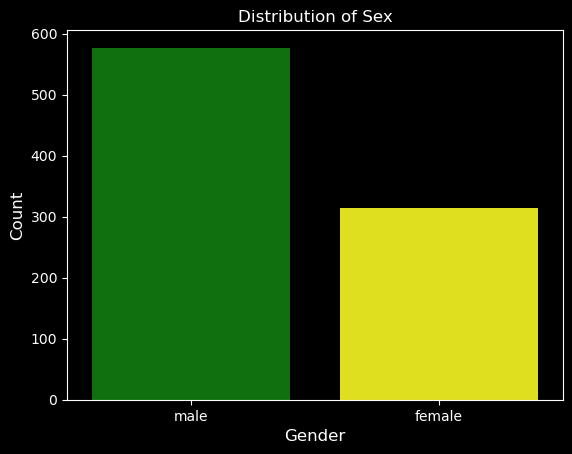

In [18]:
# Create a countplot and get the Axes object
sns.countplot(x='Sex', data=train_cn, palette=['green', 'yellow'])

# Set the x and y axis labels
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.title('Distribution of Sex')
plt.show()

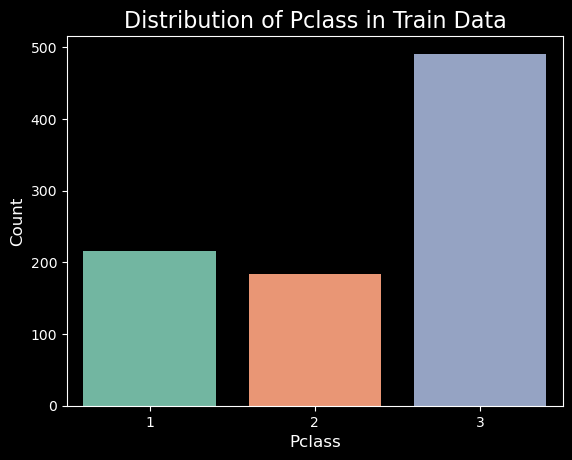

In [19]:
# Create a countplot of the 'Pclass' column of train_df
sns.countplot(x='Pclass', data=train_cn, palette='Set2')

# Set the title of the plot
plt.title('Distribution of Pclass in Train Data', fontsize=16)

# Set the labels for the x and y axes
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


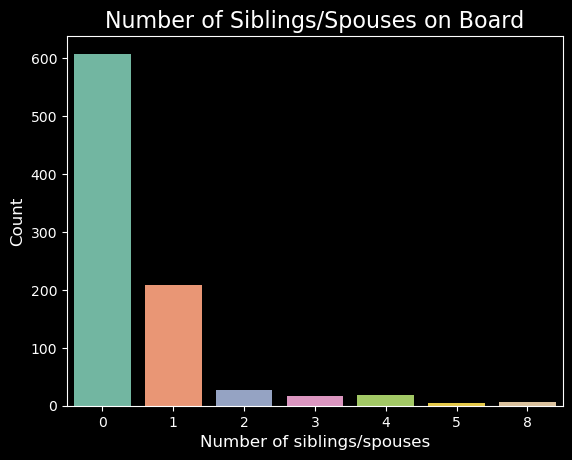

In [20]:
# Create a customized univariate plot of the "sibsp" variable in the train set
sns.countplot(x='SibSp', data=train_cn, palette='Set2')

# Set the title of the plot with a specific font and size
plt.title('Number of Siblings/Spouses on Board', fontdict={'fontsize': 16})

# Set the labels for the x and y axes
plt.xlabel("Number of siblings/spouses", fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


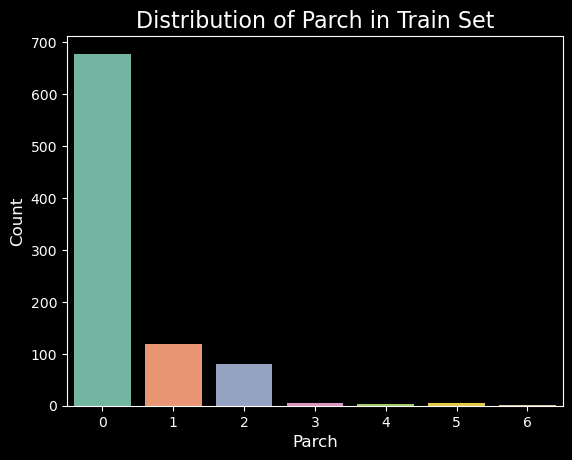

In [21]:
# Create a countplot of the 'Parch' column of train_df
sns.countplot(x='Parch', data=train_cn, palette='Set2')

# set the title of the plot
plt.title('Distribution of Parch in Train Set', fontsize=16)

# Set the labels of the x and y axes
plt.xlabel('Parch', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

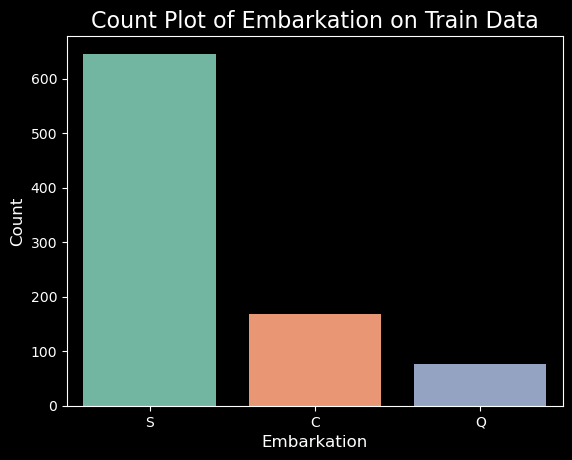

In [22]:
# Create a countplot of the 'Embarked' column of train_df
sns.countplot(x='Embarked', data=train_cn, palette='Set2')


# Add a title to the plot
plt.title('Count Plot of Embarkation on Train Data', fontsize=16)

# Add labels to the x and y axes
plt.xlabel('Embarkation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

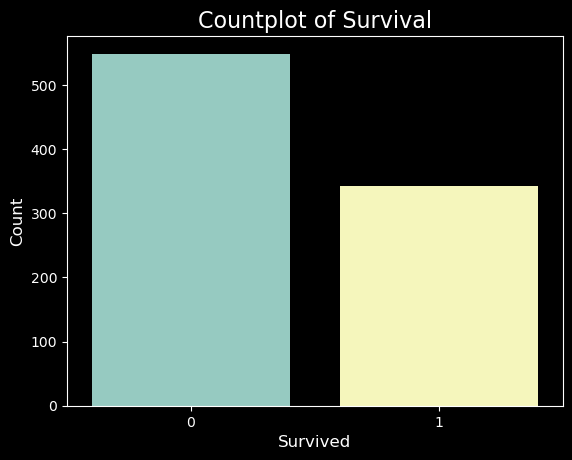

In [23]:
# Create a countplot for 'Survived'
sns.countplot(x='Survived', data=train_cn)

# Set the title and labels of the plot
plt.title('Countplot of Survival', fontsize=16)

# Set the x-axis label and y-axis label
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

#### Numerical

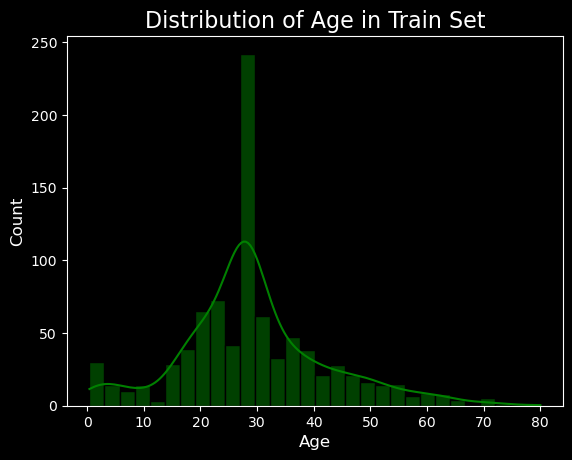

In [24]:
# Create a histogram of the "Age" variable in the train set
sns.histplot(data=train_cn,x='Age', kde=True, color='green', edgecolor='black')

# Set title
plt.title('Distribution of Age in Train Set', fontsize=16)

# Set x-axis label and y-axis label
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

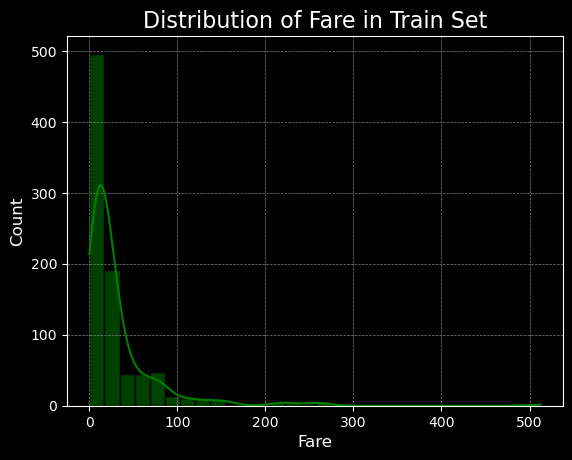

In [25]:
# Create a histplot of the "Fare" variable in the train set
sns.histplot(data=train_cn,x='Fare', kde=True, color='green', edgecolor='black', bins=30)

# Set the title
plt.title('Distribution of Fare in Train Set', fontsize=16)

# Set the labels
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### Bivariate Analysis

##### Numerical vs Numerial

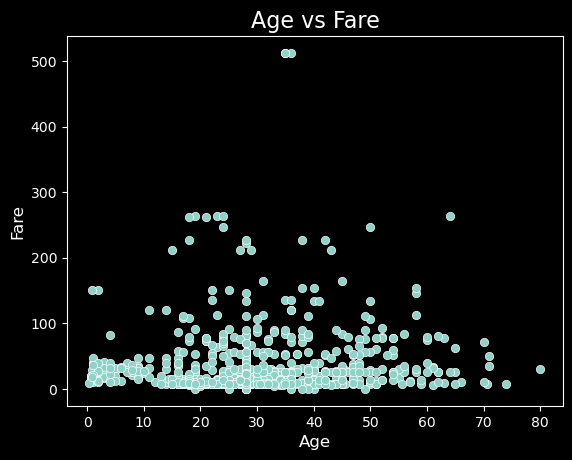

In [26]:
# Create a scatterplot of 'Age' vs 'Fare'
sns.scatterplot(x='Age', y='Fare', data=train_cn)

# Customize the plot
plt.title('Age vs Fare', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)

plt.show()


<Figure size 800x600 with 0 Axes>

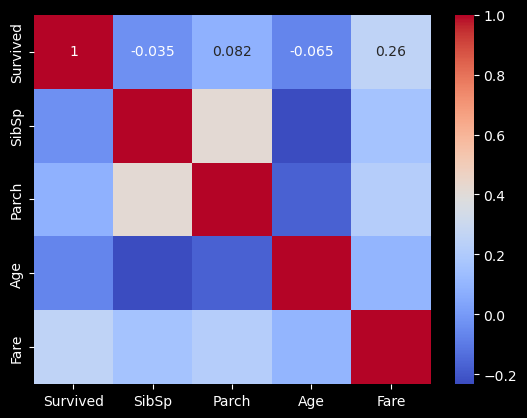

<Figure size 800x600 with 0 Axes>

In [27]:
g = sns.heatmap(train_cn[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, cmap = "coolwarm")
plt.figure(figsize=(8, 6))

sibsp and parch are correlated,both features bring the similar meaning.

##### Categorical vs Numerical

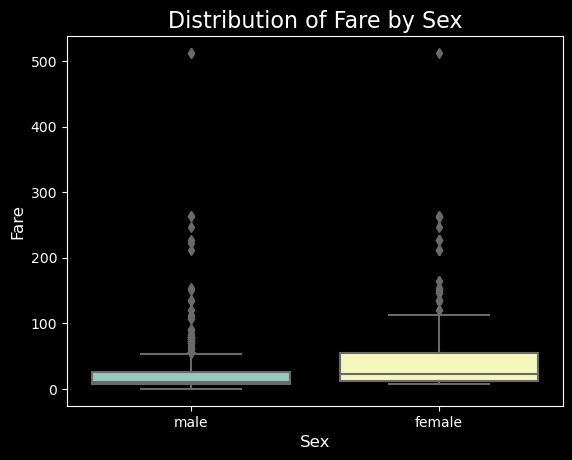

In [28]:
# Create a boxplot of 'Fare' for each 'Sex'
sns.boxplot(x='Sex', y='Fare', data=train_cn)

# Customize the plot
plt.title('Distribution of Fare by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Fare', fontsize=12)

plt.show()


The female paid a higher fare compared to males

Fare for female as much higher than for male

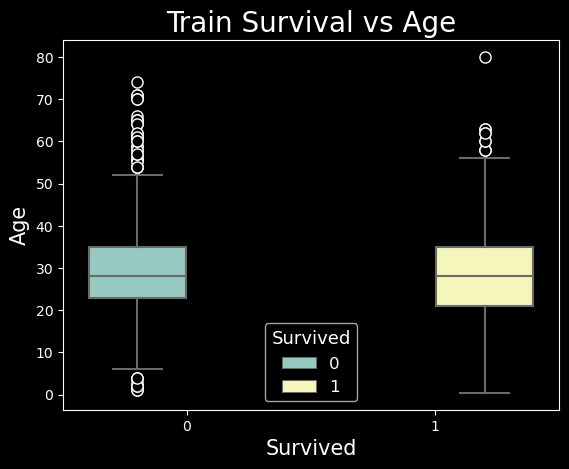

In [29]:
# Define properties for the fliers in the boxplot
flierprops = dict(marker='o', markerfacecolor='black', markersize=8,
                  linestyle='none', markeredgecolor='white')

# Create a new figure with a specified size
#plt.figure(figsize=(8,6))

# Create a boxplot of 'Age' for each 'Survived' category
sns.boxplot(x='Survived', y='Age', data=train_cn, hue='Survived', flierprops=flierprops)

# Set the title of the plot
plt.title('Train Survival vs Age', fontsize=20)

# Set the label for the x-axis
plt.xlabel('Survived', fontsize=15)

# Set the label for the y-axis
plt.ylabel('Age', fontsize=15)

# Add a legend to the plot with a title and custom font sizes
plt.legend(title='Survived', title_fontsize='13', fontsize='12')

# Display the plot
plt.show()

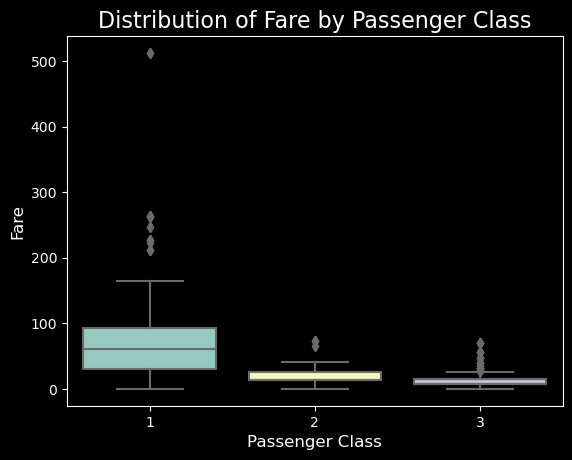

In [30]:
# Create a boxplot of 'Fare' for each 'Pclass'
sns.boxplot(x='Pclass', y='Fare', data=train_cn)

# Customize the plot
plt.title('Distribution of Fare by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)


plt.show()

Fare was much higher for passengers in 1st class and lowest for the 3rd class passengers.

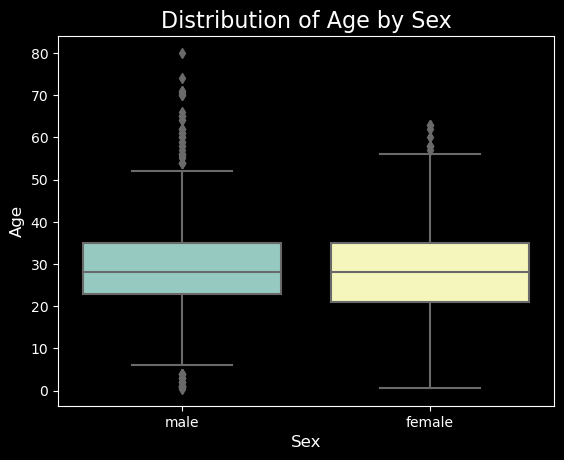

In [31]:
# Create a boxplot of 'Fare' for each 'Sex'
sns.boxplot(x='Sex', y='Age', data=train_cn)

# Customize the plot
plt.title('Distribution of Age by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.show()

The age distribution of male sex is more spread than female sex

##### Categorical vs Categorical

In [32]:
pclass_survival_counts = train_cn.groupby(['Pclass', 'Survived']).size()
print(pclass_survival_counts)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


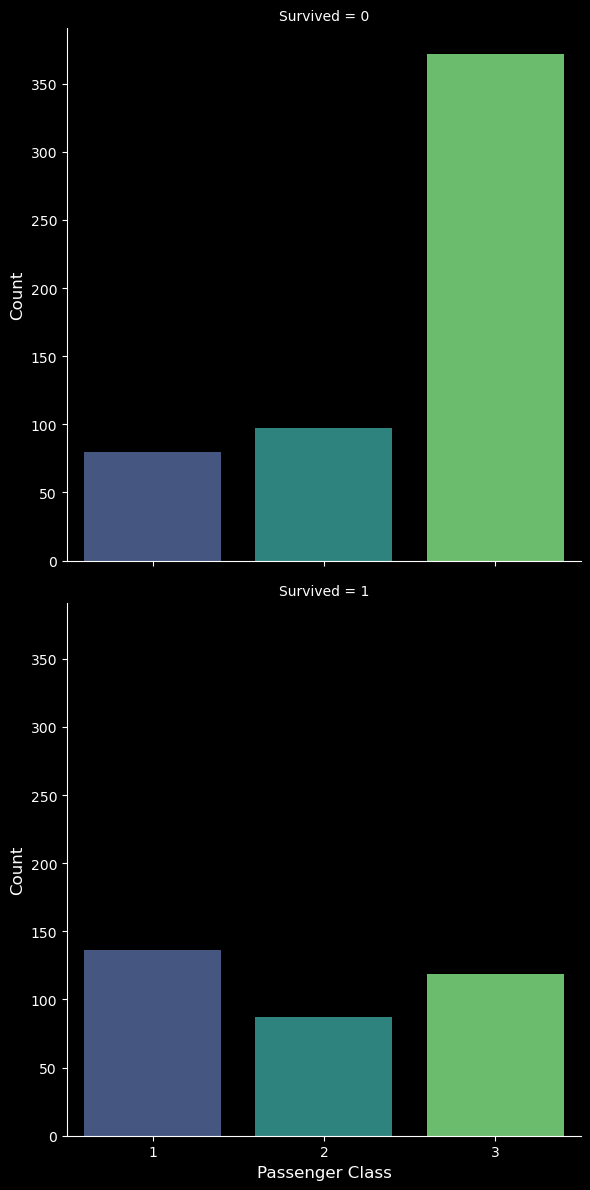

In [33]:
# Create a FacetGrid with 'Survived' as the column
g = sns.FacetGrid(train_cn, row='Survived', height=6, aspect=1)

# Create a countplot for 'Pclass' in each facet
g.map(sns.countplot, 'Pclass', order=[1, 2, 3], palette='viridis')

# Set the titles for the facets
g.set_titles('Survived = {row_name}', fontsize=16,)

# Set the x and y axis labels
g.set_xlabels('Passenger Class', fontsize=12)
g.set_ylabels('Count', fontsize=12)

plt.show()

Passengers in 1st class were more likely to survive

In [34]:
survival_counts = train_cn.groupby(['Sex', 'Survived']).size()
print(survival_counts)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


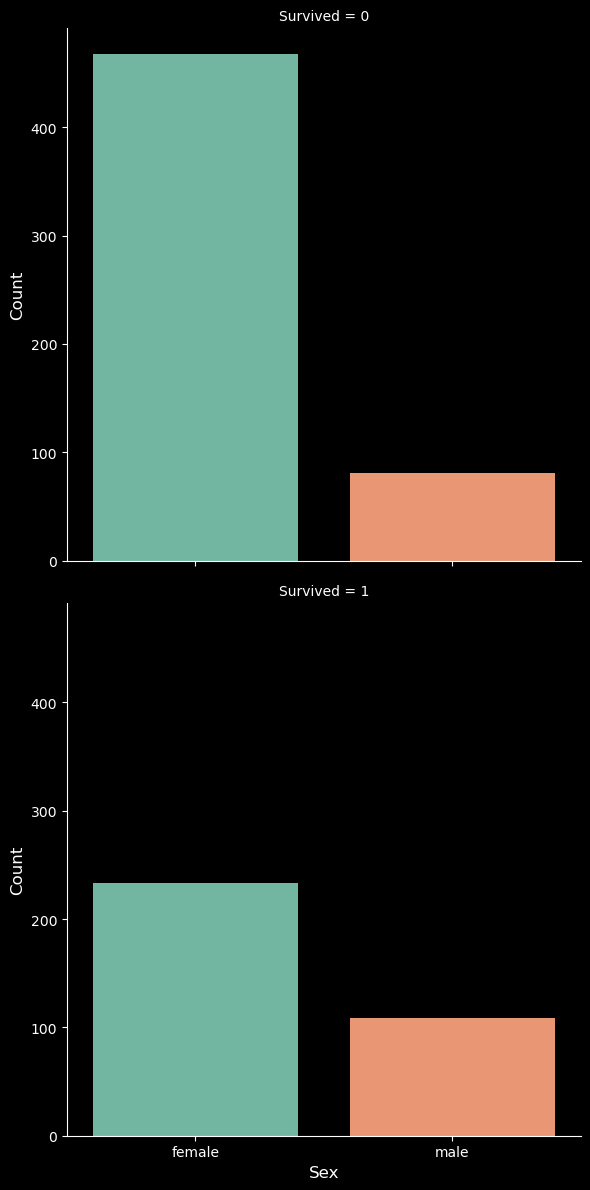

In [35]:
# Create a FacetGrid with 'Survived' as the column
g = sns.FacetGrid(train_cn, row='Survived', height=6, aspect=1)

# Create a countplot for 'Sex' in each facet
g.map(sns.countplot, 'Sex', palette='Set2')

# Set the titles for the facets
g.set_titles('Survived = {row_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Sex', fontsize=12)
g.set_ylabels('Count', fontsize=12)

plt.show()

Female sex is likely to survive more than male sex

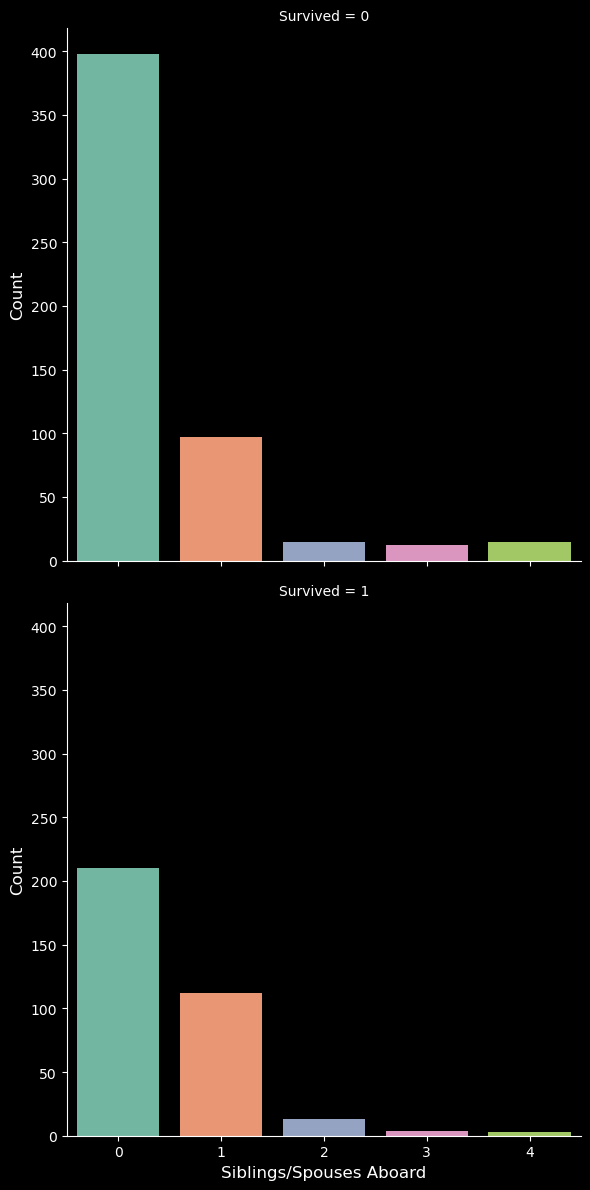

In [36]:
# Create a FacetGrid with 'Survived' as the column
g = sns.FacetGrid(train_cn, row='Survived', height=6, aspect=1)

# Create a countplot for 'SibSp' in each facet
g.map(sns.countplot, 'SibSp', palette='Set2')

# Set the titles for the facets
g.set_titles('Survived = {row_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Siblings/Spouses Aboard', fontsize=12)
g.set_ylabels('Count', fontsize=12)

plt.show()

People with Zero sibling/spouse aboard were more likely to survive

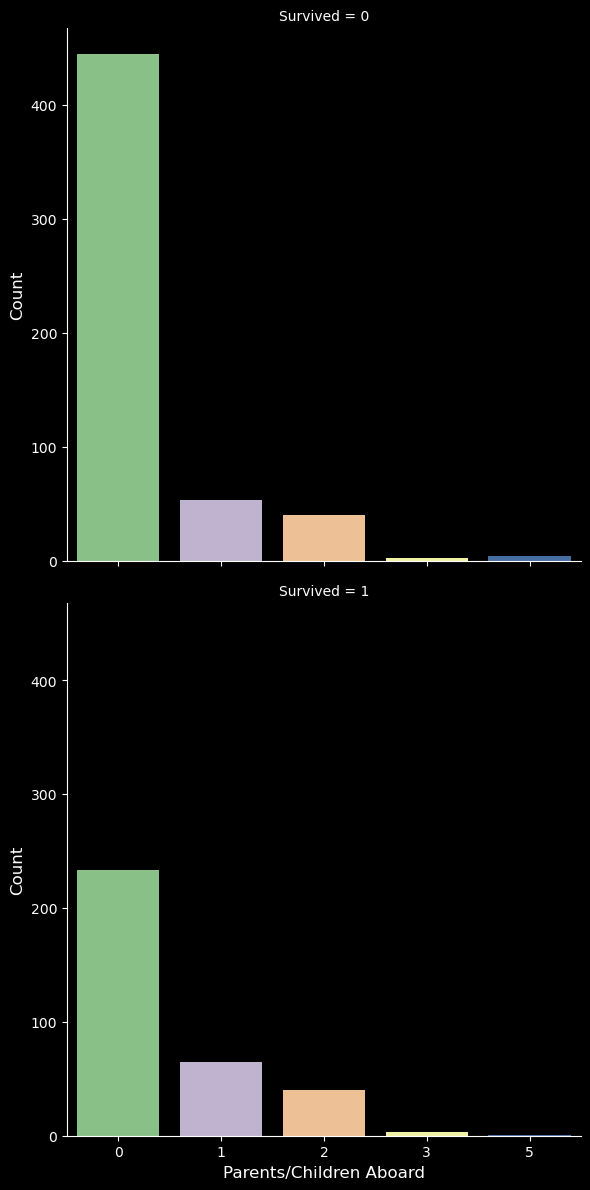

In [37]:
# Create a FacetGrid with 'Survived' as the column
g = sns.FacetGrid(train_cn, row='Survived', height=6, aspect=1)

# Create a countplot for 'Parch' in each facet
g.map(sns.countplot, 'Parch', palette='Accent')

# Set the titles for the facets
g.set_titles('Survived = {row_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Parents/Children Aboard', fontsize=12)
g.set_ylabels('Count', fontsize=12)

plt.show()

People with Zero parents/children aboard were more likely to survive

In [38]:
survival_counts = train_cn.groupby(['Embarked', 'Survived']).size()
print(survival_counts)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64


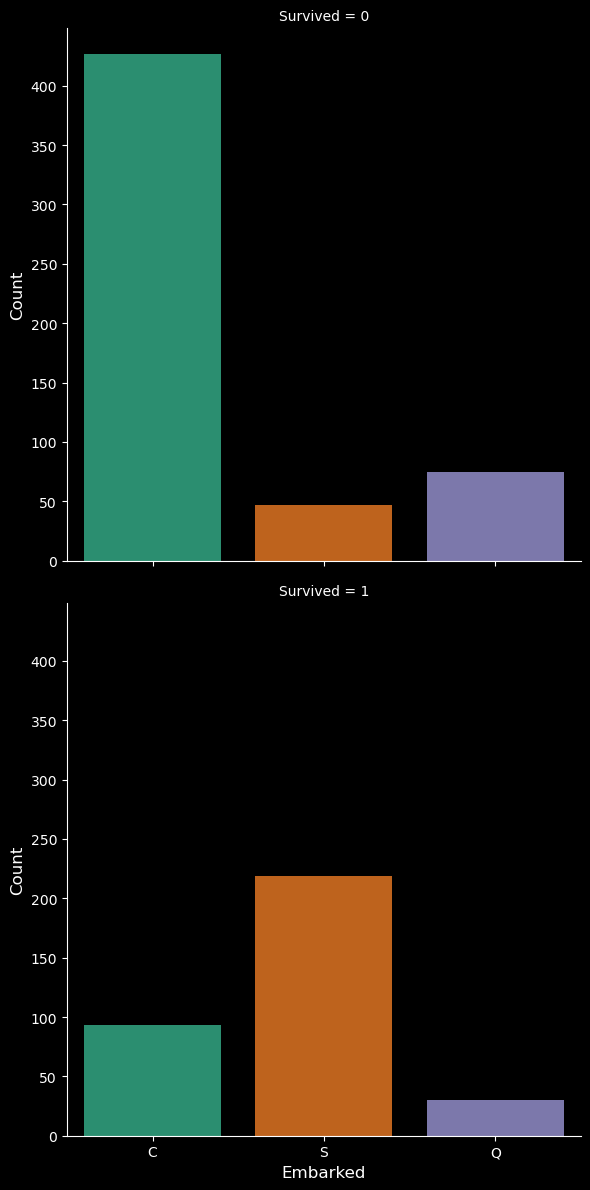

In [39]:
# Create a FacetGrid with 'Survived' as the column
g = sns.FacetGrid(train_cn, row='Survived', height=6, aspect=1)

# Create a countplot for 'Embarked' in each facet
g.map(sns.countplot, 'Embarked', palette='Dark2')

# Set the titles for the facets
g.set_titles('Survived = {row_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Embarked', fontsize=12)
g.set_ylabels('Count', fontsize=12)

plt.show()

People that embarked in Southampton had a higher chance of surviving
the journey than those who did not.

### Multivariate Analysis

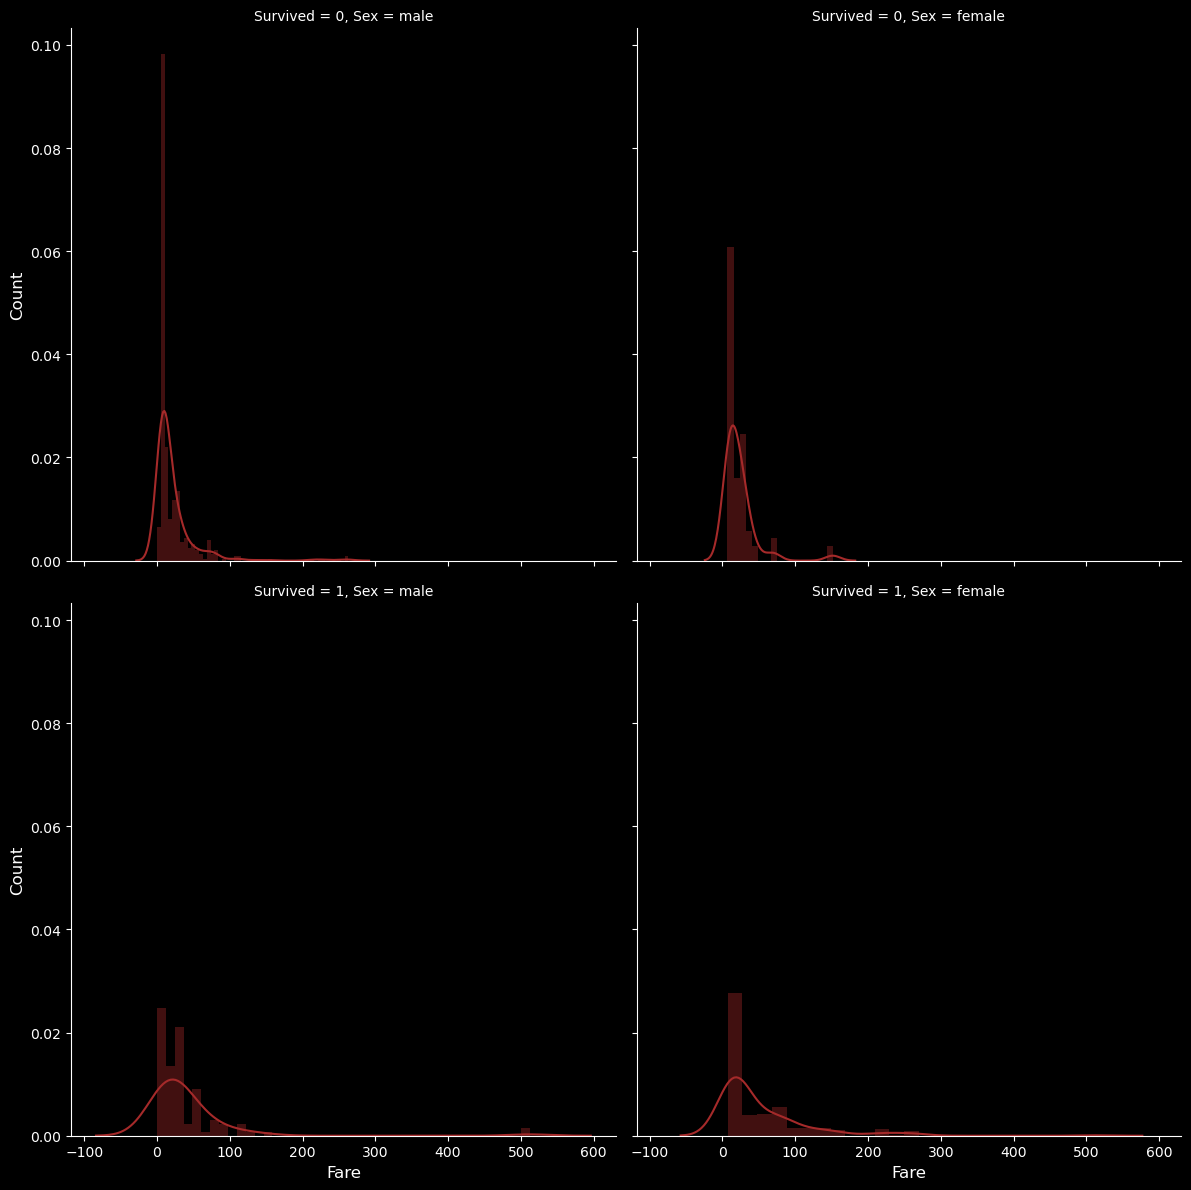

In [40]:
# Create a FacetGrid with 'Survived' as the row and 'Sex' as the column
g = sns.FacetGrid(train_cn, row='Survived', col='Sex', height=6, aspect=1)

# Create a histogram for 'Fare' in each facet
g.map(sns.distplot, 'Fare', color='brown')

# Set the titles for the facets
g.set_titles('Survived = {row_name}, Sex = {col_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Fare', fontsize=12)
g.set_ylabels('Count', fontsize=12)

plt.show()

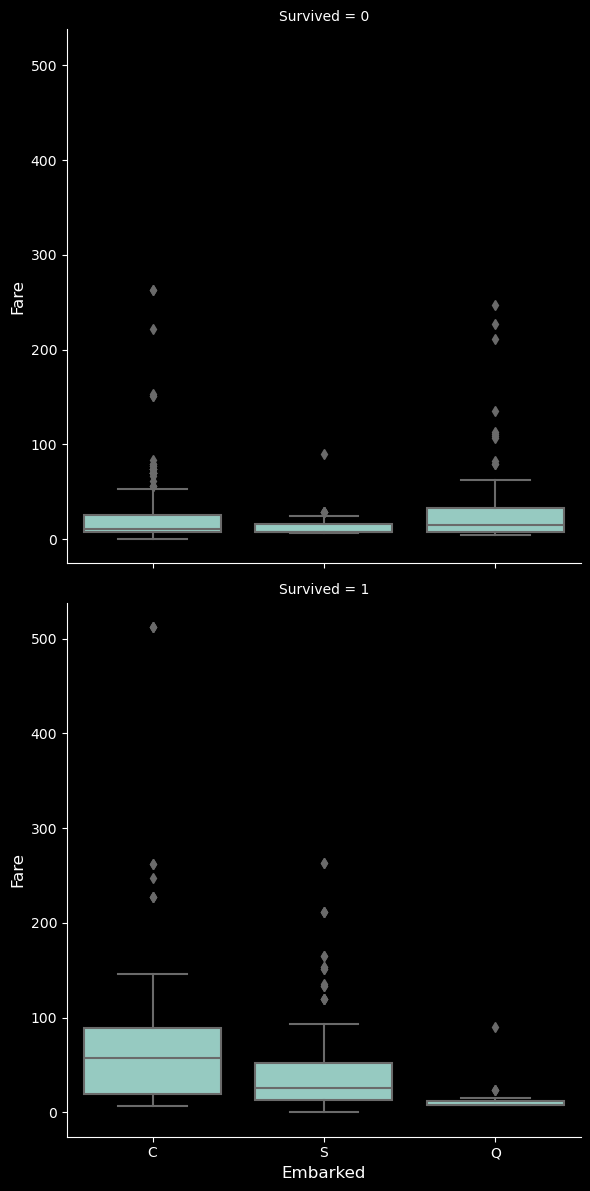

In [41]:
# Create a FacetGrid with 'Survived' as the column and 'Embarked' as the x-axis
g = sns.FacetGrid(train_cn, row='Survived', height=6, aspect=1)

# Create a boxplot for 'Fare' in each facet
g.map(sns.boxplot, 'Embarked', 'Fare')

# Set the titles for the facets
g.set_titles('Survived = {row_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Embarked', fontsize=12)
g.set_ylabels('Fare', fontsize=12)

plt.show()

people that embarked in southampton and  Cherbourg with higher fares paid had a greater chance of surviving

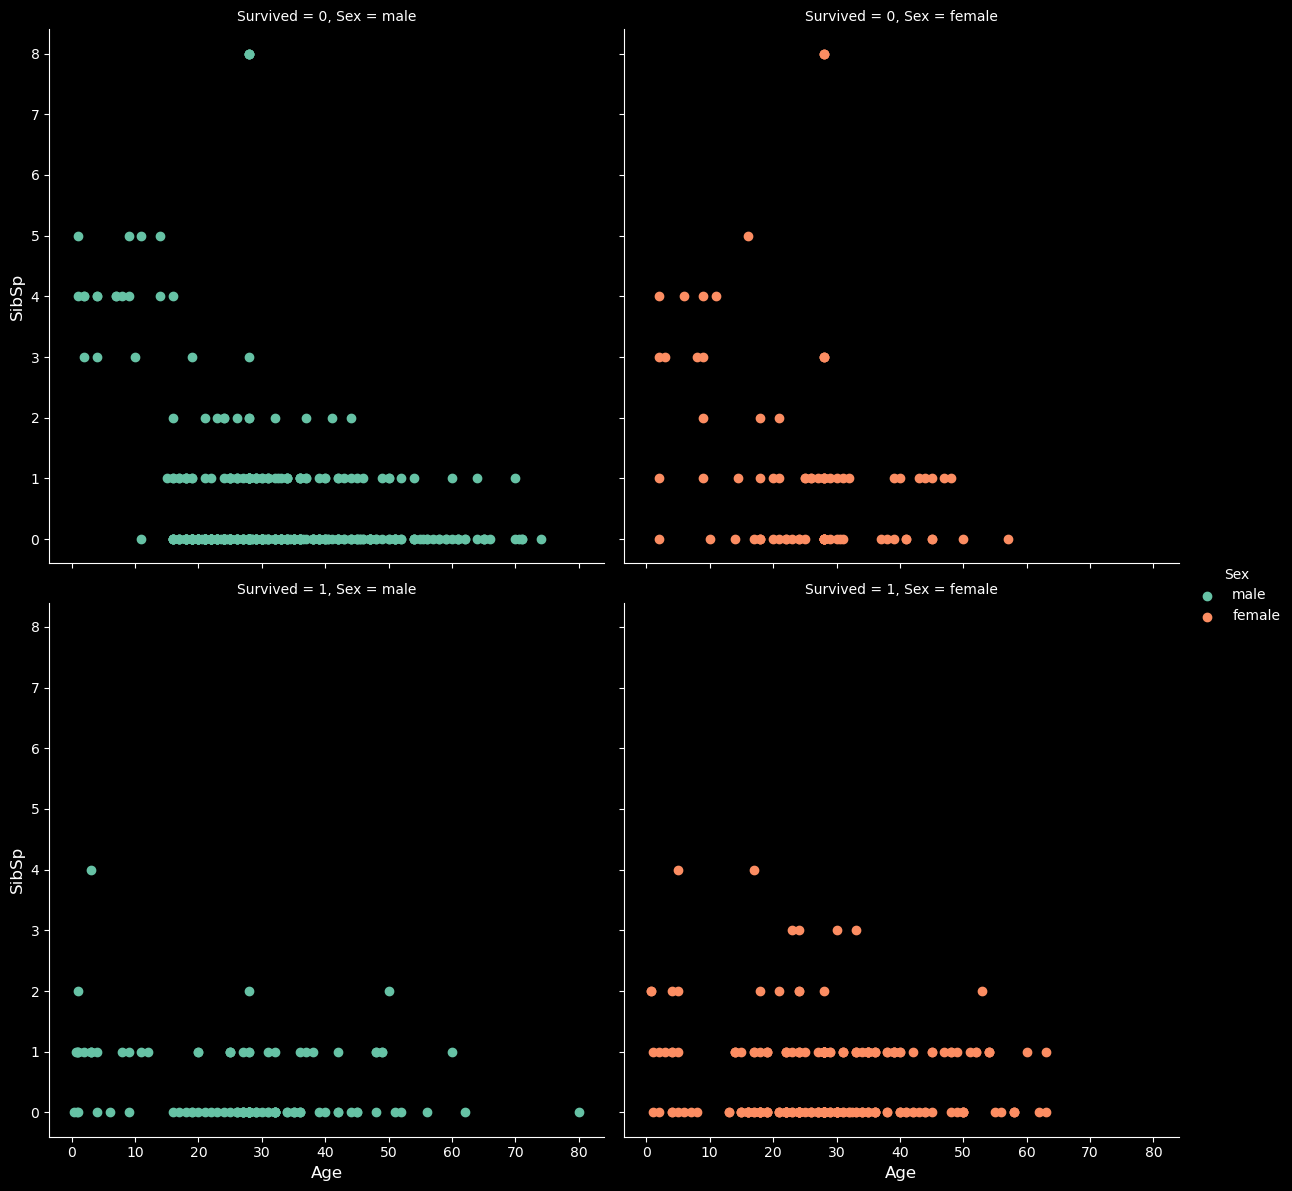

In [42]:
# Create a FacetGrid with 'Survived' and 'Sex' as the rows and columns
g = sns.FacetGrid(train_cn, row='Survived', col='Sex', hue='Sex', palette='Set2', height=6, aspect=1)

# Create a scatterplot for 'Age' and 'SibSp' in each facet
g.map(plt.scatter, 'Age', 'SibSp').add_legend()

# Set the titles for the facets
g.set_titles('Survived = {row_name}, Sex = {col_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Age', fontsize=12)
g.set_ylabels('SibSp', fontsize=12)

plt.show()

Passengers with less or none of siblings/spouses had a higher change of surviving. Survivors were young on average

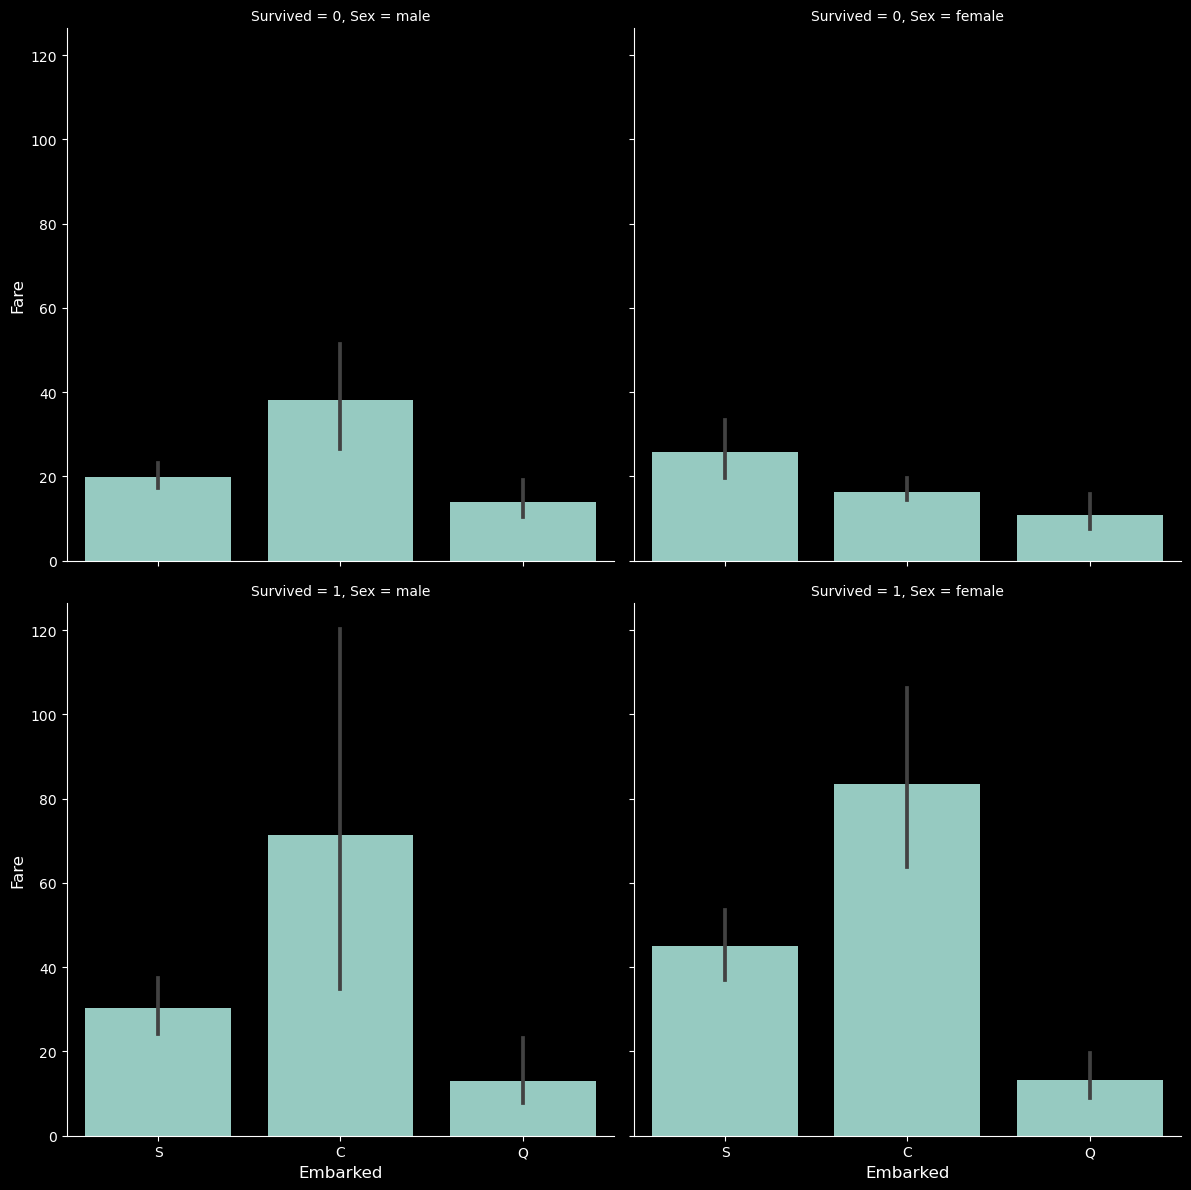

In [43]:
# Create a FacetGrid with 'Survived' as the row and 'Sex' as the column
g = sns.FacetGrid(train_cn, row='Survived', col='Sex', height=6, aspect=1)

# Create a barplot for 'Fare' in each facet
g.map(sns.barplot, 'Embarked', 'Fare', order=['S', 'C', 'Q'])

# Set the titles for the facets
g.set_titles('Survived = {row_name}, Sex = {col_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Embarked', fontsize=12)
g.set_ylabels('Fare', fontsize=12)

plt.show()

survivors paid higher fares on average. The average fare varied by port of embarkation 

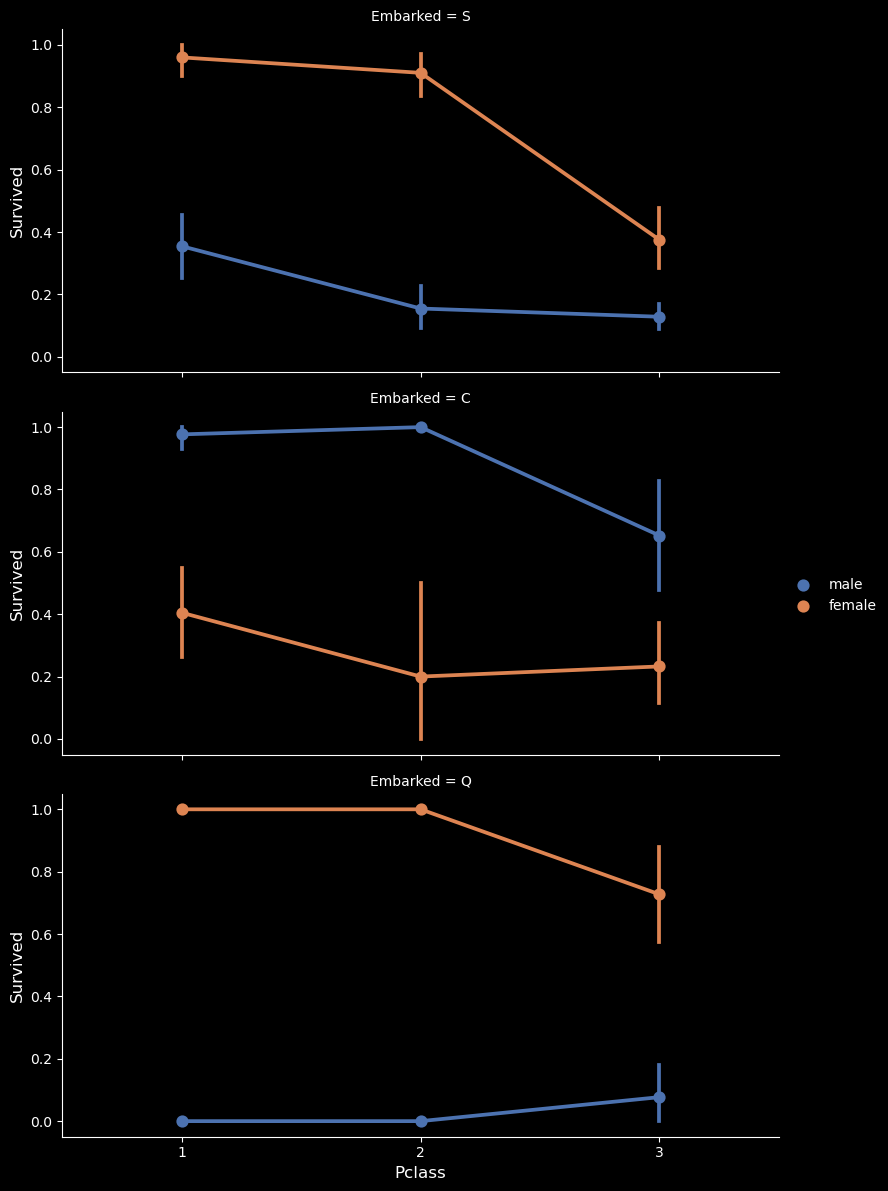

In [44]:
# Create a FacetGrid with 'Survived' as the row and 'Sex' as the column
g = sns.FacetGrid(train_cn, row='Embarked', height=4, aspect=2)

# Create a pointplot for 'Embarked' in each facet
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

# Add a legend
g.add_legend()

# Set the titles for the facets
g.set_titles('Embarked = {row_name}', fontsize=16)

# Set the x and y axis labels
g.set_xlabels('Pclass', fontsize=12)
g.set_ylabels('Survived', fontsize=12)

plt.show()

Female that embarked in southampton and Queenstown  for 1st class had a higher chance of surviving.
Males that embarked in Cherbourgfor 1st class had a greater chance of surviving.

In [45]:
pclass_sex_survival_counts = train_cn.groupby(['Pclass', 'Sex', 'Survived']).size()
print(pclass_sex_survival_counts)

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64


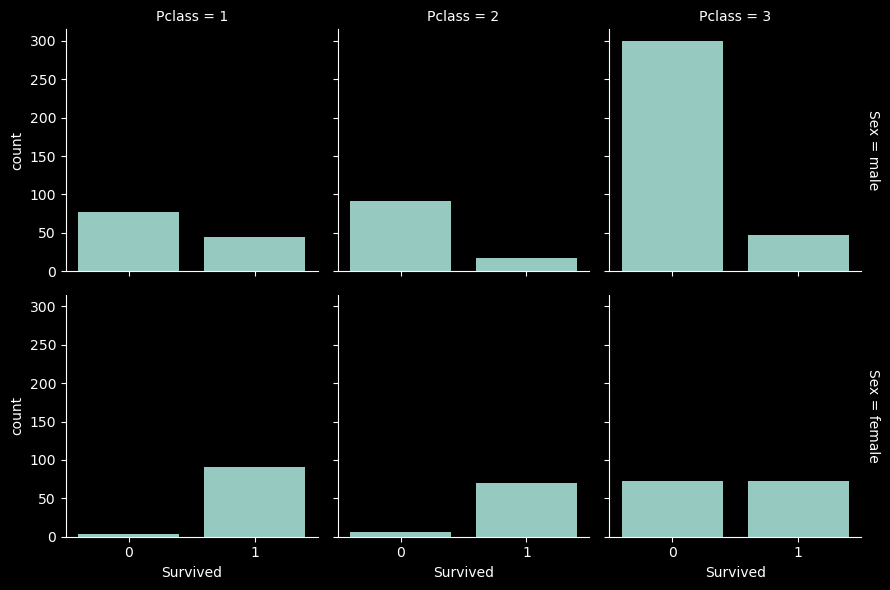

In [46]:
# Create a FacetGrid object
grid = sns.FacetGrid(train_cn, row='Sex', col='Pclass', margin_titles=True)

# Map a countplot onto the grid
grid.map(sns.countplot, 'Survived', order=[0, 1])

# Show the plot
plt.show()